In [3]:
from gprMax.gprMax import api
from random import random as rd
from math import sqrt
filename_g = 'healthy'
filename = 'cavity'

b_scan_cnt = 20
resolution = 0.002
time_window = 3e-8

x_gap = 0.01
y_gap = 0.01
src_to_pml = 0.01

In [22]:
radius =  0.3
src_to_trunk = 0.2
src_to_rx = 0.1
travel_dist = 0.3

eps_trunk = 5
eps_cavity = 1
cavity_x_offset = 0.1
cavity_y_offset = -0.2
cavity_radius_ratio = 0.3

In [23]:
cavity_r_offset_max = radius * (1 - cavity_radius_ratio)
cavity_r_offset = sqrt(cavity_x_offset**2 + cavity_y_offset**2)
if(cavity_r_offset > cavity_r_offset_max):
    cavity_x_offset = cavity_x_offset * cavity_r_offset_max / cavity_r_offset
    cavity_y_offset = cavity_y_offset * cavity_r_offset_max / cavity_r_offset
    
diameter = radius* 2
step = (travel_dist * 2 + diameter - src_to_rx) / b_scan_cnt
pml = 0.002 * 10
sharp_domain = [travel_dist * 2 + diameter, diameter + src_to_trunk]
domain = [sharp_domain[0] + pml * 2 + x_gap * 2, sharp_domain[1] +  pml * 2 + y_gap + src_to_pml]

trunk_center = [travel_dist + radius + pml + x_gap, src_to_trunk + radius + pml + src_to_pml]
z = 0
src_position = [pml + x_gap, pml + src_to_pml , z]
rx_position = [src_position[0] + src_to_rx, src_position[1], z]

In [24]:
with open("healthy.in", "w") as file:
    file.write('#title: Healthy Tree\n')
    file.write("#domain: {:.2f} {:.2f} 0.002\n".format(domain[0], domain[1]))
    file.write("#dx_dy_dz: {} {} {}\n".format(resolution, resolution, resolution))
    file.write("#time_window: {}\n".format(time_window))
    file.write('\n')
    file.write('#material: {} 0 1 0 trunk\n'.format(eps_trunk))
    file.write('#material: {} 0 1 0 cavity\n'.format(eps_cavity))
    file.write('\n')
    file.write("#cylinder: {:.2f} {:.2f} 0 {:.2f} {:.2f} 0.002 {:.2f} trunk\n".format(trunk_center[0], trunk_center[1], trunk_center[0], trunk_center[1], radius))
    file.write("#cylinder: {:.2f} {:.2f} 0 {:.2f} {:.2f} 0.002 {:.2f} cavity\n".format(trunk_center[0] + cavity_x_offset, trunk_center[1] + cavity_y_offset, trunk_center[0] + cavity_x_offset, trunk_center[1] + cavity_y_offset, radius*cavity_radius_ratio))
    file.write('\n')
    file.write('#waveform: ricker 1 1e9 my_ricker\n')
    file.write("#hertzian_dipole: z {:.2f} {:.2f} {:.2f} my_ricker\n".format(src_position[0], src_position[1], src_position[2]))
    file.write("#rx: {:.2f} {:.2f} {:.2f}\n".format(rx_position[0], rx_position[1], rx_position[2]))
    file.write("#src_steps: {:.3f} 0 0\n".format(step))
    file.write("#rx_steps: {:.3f} 0 0\n".format(step))
    file.write("#geometry_objects_write: 0 0 0 {:.2f} {:.2f} 0.002 healthy_full\n".format(domain[0], domain[1]))
    file.write("#geometry_objects_write: {:.2f} {:.2f} 0 {:.2f} {:.2f} 0.002 healthy\n".format((trunk_center[0]) - radius, (trunk_center[1]) - radius, (trunk_center[0]) + radius, (trunk_center[1]) + radius))



=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2023: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

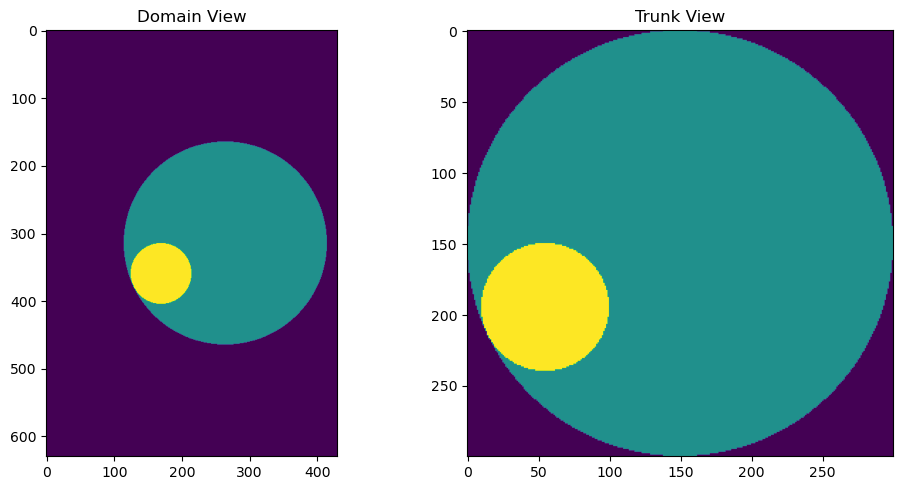

In [25]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

api(filename_g + '.in', n=1, geometry_only=True)

with h5py.File(filename_g + '_full.h5', 'r') as f:
    dset = f['data'][()]

with h5py.File(filename_g + '.h5', 'r') as f2:
    dset2 = f2['data'][()]

# Set the desired width and height of the figure
fig_width = 10
fig_height = 5

# Create the figure and axes objects with the desired size and arrangement
fig, axs = plt.subplots(1, 2, figsize=(fig_width, fig_height))

# Plot dset on the left subplot
axs[0].imshow(dset, cmap='viridis')
axs[0].set_title('Domain View')

# Plot dset2 on the right subplot
axs[1].imshow(dset2, cmap='viridis')
axs[1].set_title('Trunk View')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the image
plt.show()


In [ ]:
%matplotlib inline
api(filename_g + '.in', n=b_scan_cnt, geometry_only=False, geometry_fixed=True)
from tools.outputfiles_merge import merge_files
merge_files(filename_g,True)

In [21]:
import os
def increment_file_index(string):
    result = ""
    for char in string:
        if char.isdigit():
            digit = int(char)
            next_digit = digit + 1
            replaced_char = str(next_digit)
            result += replaced_char
        else:
            result += char
    return result
source_file = "healthy_merged.out"
destination_file = "Dataset/bscan_dataset_1.out"

while os.path.isfile(destination_file):
    filename, extension = os.path.splitext(destination_file)
    destination_file = increment_file_index(destination_file)

with open(source_file, "rb") as source, open(destination_file, "wb") as destination:
    destination.write(source.read())